In [1]:
import run_lstm

Using TensorFlow backend.


In [2]:
import lstm 
import time
import matplotlib.pyplot as plt
import numpy as np

In [66]:
global_start_time = time.time()
# run with values below first to see how long it takes on your machine
epochs  = 3  # suggest 100 for sine wave, 10 for stock
seq_len = 20 # suggest using 25 for sine wave, 50 for stock

print('> Loading data... ')

X_train, y_train, X_test, y_test = lstm.load_data('../data/intc_nonamedate.csv', seq_len, True) # data is sine wave, already normalized

# stock data
#X_train, y_train, X_test, y_test = lstm.load_data('../data/sp500.csv', seq_len, True) # data is a stock, normalize data is True

print('> Data Loaded. Compiling...')

model = lstm.build_model([5, seq_len, 100, 1]) # 1 input layer, layer 1 has seq_len neurons, layer 2 has 100 neurons, 1 output

model.fit(
    X_train,
    y_train,
    batch_size=5,
    nb_epoch=epochs,
    validation_split=0.05)

print('> Completed.')
print('Training duration (s) : ', time.time() - global_start_time)


predictions = lstm.predict_sequences_multiple(model, X_test, seq_len, 30) #model, data, window_size, prediction length)


> Loading data... 
(2999, 20, 5)
> Data Loaded. Compiling...
> Compilation Time :  0.012501001358032227
Train on 2564 samples, validate on 135 samples
Epoch 1/3
2564/2564 [==============================] - 17s 7ms/step - loss: 0.0010 - val_loss: 5.6111e-04
Epoch 2/3
2564/2564 [==============================] - 16s 6ms/step - loss: 5.2153e-04 - val_loss: 3.8065e-04
Epoch 3/3
2564/2564 [==============================] - 16s 6ms/step - loss: 3.8545e-04 - val_loss: 2.2211e-04
> Completed.
Training duration (s) :  50.8860080242157


In [67]:

fig = plt.figure(figsize=(20,15),facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test)
#Pad the list of predictions to shift it in the graph to it's correct start
for i, data in enumerate(predictions):
    if i != 0:
        padding = [None for p in range(i * 30)]
        plt.plot(padding + data)

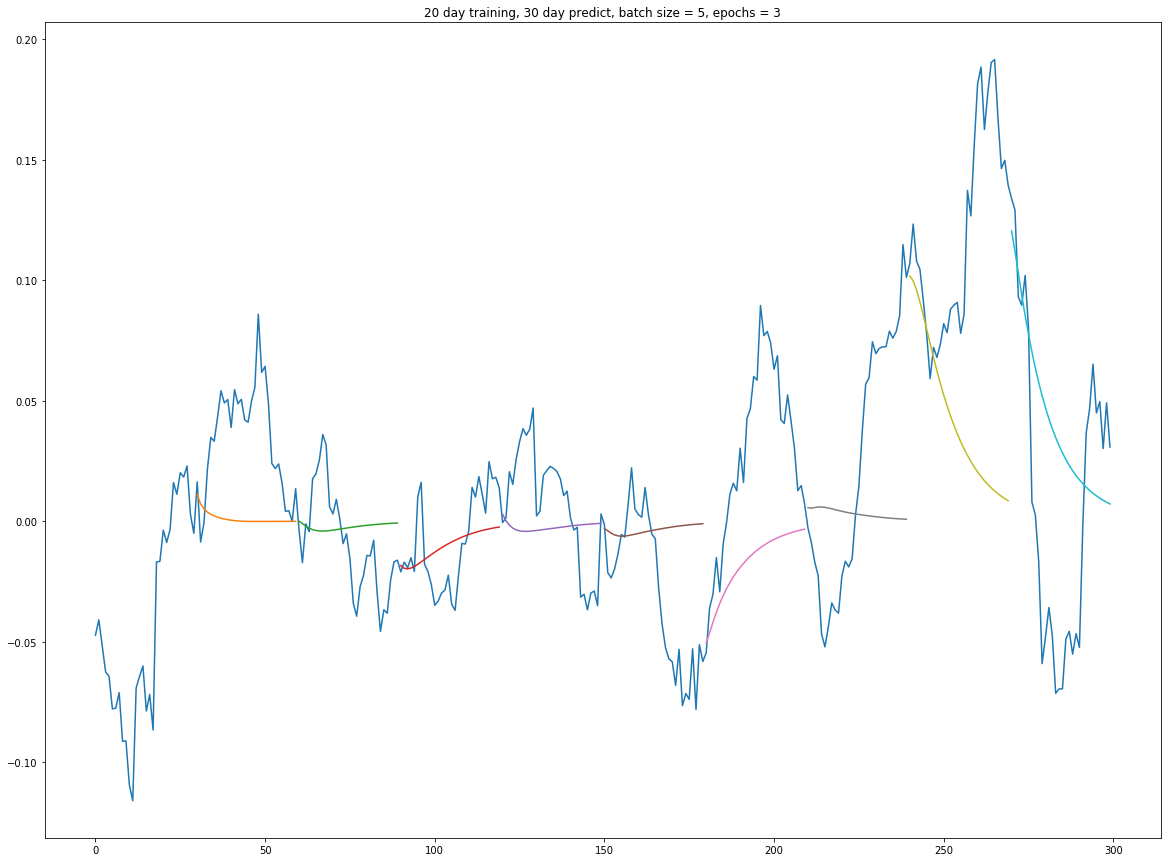

In [68]:
ax.set_title('20 day training, 30 day predict, batch size = 5, epochs = 3')
plt.show()

In [69]:
def get_mean_error (test_size, predictions, y_test):
    pred30 = []
    true30 = []
    for i, pred in enumerate(predictions):
        day30_prediction = pred[-1]
        true_val = y_test[i*test_size]
        pred30.append(day30_prediction)
        true30.append(true_val)
        
    return mean_squared_error(true30,pred30)
    
    

    

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
get_mean_error(30,predictions,y_test)

0.0031227424431096635

In [72]:
predsend = []
predsstart = []
for i, pred in enumerate(predictions):
    predend = pred[-1]
    predsend.append(predend)
    predstart = pred[0]
    predsstart.append(predstart)
    


In [73]:
len(predictions[0])

30

In [74]:
ystart = y_test[[30,60,90,120,150,180,210,240,270]]
yend = y_test[[59,89,119,149,179,209,239,269,299]]


In [75]:
goesup = np.array(predsend) - np.array(predsstart)

In [76]:
goesup = goesup > 0
goesup = goesup[1:]

In [82]:
xx = yend - ystart
goesup

array([False, False,  True, False,  True,  True, False, False, False], dtype=bool)

In [81]:
xx

array([-0.00286927, -0.01263154,  0.03493659,  0.00360993, -0.05683735,
        0.06183738,  0.10410812,  0.0324571 , -0.10317252])

In [102]:
for i, up in enumerate(goesup):
    summ = 0
    if up == True:
        summ += xx[i]
    else:
        summ -= xx[i]


False
False
True
False
True
True
False
False
False


In [103]:
summ

0.10317252284055778

In [104]:
up

False

In [105]:
np.sum(xx)

0.06143843447314179